In [1]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt


In [2]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,2,1,2,2,4,4,7,7,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,83,93,99,117,129,149,149,197,238,428
5,British Columbia,Canada,0,0,0,0,0,0,1,1,...,21,21,27,32,32,39,46,64,64,73
6,New South Wales,Australia,0,0,0,0,3,4,4,4,...,26,28,38,48,55,65,65,92,112,134
7,Victoria,Australia,0,0,0,0,1,1,1,1,...,10,11,11,15,18,21,21,36,49,57
8,Queensland,Australia,0,0,0,0,0,0,0,1,...,13,13,15,15,18,20,20,35,46,61
9,NaN,Cambodia,0,0,0,0,0,1,1,1,...,1,1,2,2,2,3,3,5,7,7


In [3]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>200)]

df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,4,5,5,6,9,9,...,60,63,76,91,107,128,128,200,250,297
Austria,0,0,0,0,0,0,0,0,0,0,...,55,79,104,131,182,246,302,504,655,860
Bahrain,0,0,0,0,0,0,0,0,0,0,...,60,85,85,95,110,195,195,189,210,214
Belgium,0,0,0,0,0,0,0,0,0,0,...,109,169,200,239,267,314,314,559,689,886
Canada,0,0,0,0,1,1,2,2,2,4,...,49,54,64,77,79,108,117,193,198,252
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003
Cruise Ship,0,0,0,0,0,0,0,0,0,0,...,696,696,696,696,696,696,696,696,696,696
Czechia,0,0,0,0,0,0,0,0,0,0,...,18,19,31,31,41,91,94,141,189,253
Denmark,0,0,0,0,0,0,0,0,0,0,...,24,24,37,92,264,444,617,804,836,875


MovieWriter ffmpeg unavailable.


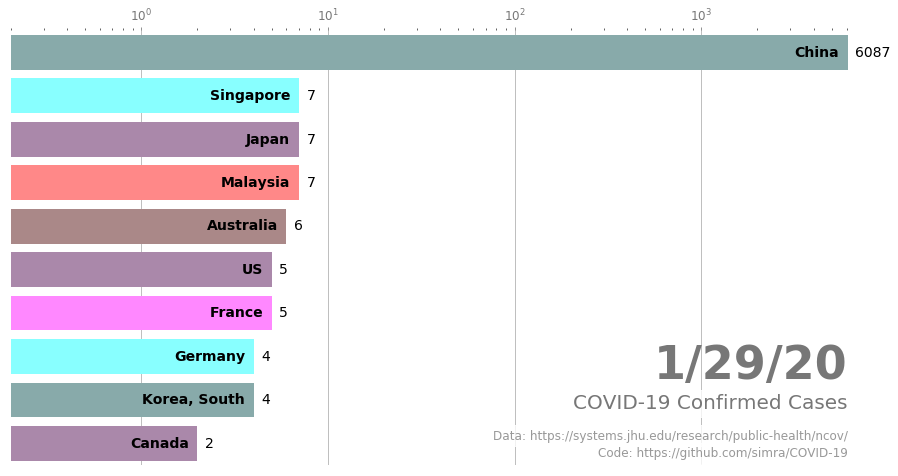

In [98]:

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from math import log10
import numpy as np


#palette = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
#     '#aafbff', '#f7bb5f', '#eafb50']
palette = ['#aa8888', '#88aa88', '#aa8888', '#aaaa88',
     '#aa88aa', '#88aaaa', '#ff8888', '#88ff88', '#ff8888', '#ffff88',
     '#ff88ff', '#88ffff' ]

colors = dict(zip(
    df.index,
    palette*ceil(len(df.columns)/len(palette))))

fig, ax = plt.subplots(figsize=(15, 8))

def plot_barchart(date_tuple):
    (current_date,next_date,increment)=date_tuple
    
    dff = (df[current_date]
           .sort_values(ascending=False)
           .head(10))
    dff = dff[::-1]   
    
    dfnext = (df[next_date]
           .sort_values(ascending=True))
    
    start_countries = set(dff.index)
    end_countries = set(dfnext.index[len(dfnext)-10:])
    add_countries = end_countries.difference(start_countries)
    #print(len(end_countries),add_countries)
    dff=pd.concat([dfnext[dfnext.index.isin(add_countries)],dff])
    
    # dff ordered from lowest to largest.
    start_pos = dict([(c,i+10-len(dff.index)) for i,c in enumerate(dff.index)])
    start_vals = dict(zip(dff.index,dff))
    # dfnext ordered from lowest to largest too. Last element should have i=9
    end_pos = dict([(c,i+10-len(dfnext.index)) for i,c in enumerate(dfnext.index)])
    end_vals = dict(zip(dfnext.index,dfnext))
    
    x=[(1-increment)*start_pos[c]+increment*(end_pos[c]) for c in dff.index]
    y=[int((1-increment)*start_vals[c]+increment*end_vals[c]) for c in dff.index ]
    #print(x)
    #dff.plot(kind='barh',ax=ax)
    ax.clear()
    ax.barh(x, y, color=[colors[k] for k in dff.index])
    
    #dx = log10(dff.max())*10# 200 # TODO
    #dx = 0
    
    for i, name in enumerate(dff.index):
        ax.text(0.9*y[i], x[i],     name,    size=14, weight=600,        ha='right', va='center')  
        ax.text(1.1*y[i], x[i],     y[i],      size=14,      ha='left', va='center') 
    # Add year right middle portion of canvas
    ax.text(1, 0.2, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(1, 0.13, 'COVID-19 Confirmed Cases', transform=ax.transAxes, ha='right', size=20,
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.06, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.set_xscale('log')
    plt.xlim(min(y)/10,max(y))
    plt.ylim(-0.5,len(start_countries)-0.5)
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.set_yticks([])
    plt.box(False)
    
test = False
if test:
    plot_barchart((df.columns[-1],df.columns[-2],0.4))
else:
    r = np.linspace(0,1,5,endpoint=False)
    #print(r)
    frames = [(df.columns[i],df.columns[i+1],j)  for i in range(7,len(df.columns)-2) for j in r ]
    #print(frames)
    animator = animation.FuncAnimation(fig, plot_barchart, frames=frames)
    #HTML(animator.to_jshtml()) 
    animator.save('animation.gif')